time = 0.010 ; x = 1.008 ; y = 1.328; z = 0.982
time = 0.020 ; x = 1.032 ; y = 1.659; z = 0.968
time = 0.030 ; x = 1.071 ; y = 1.998; z = 0.958
time = 0.040 ; x = 1.125 ; y = 2.349; z = 0.953
time = 0.050 ; x = 1.193 ; y = 2.717; z = 0.954
time = 0.060 ; x = 1.277 ; y = 3.107; z = 0.961
time = 0.070 ; x = 1.376 ; y = 3.524; z = 0.976
time = 0.080 ; x = 1.492 ; y = 3.973; z = 1.000
time = 0.090 ; x = 1.625 ; y = 4.459; z = 1.035
time = 0.100 ; x = 1.776 ; y = 4.988; z = 1.084
time = 0.110 ; x = 1.946 ; y = 5.564; z = 1.148
time = 0.120 ; x = 2.137 ; y = 6.194; z = 1.232
time = 0.130 ; x = 2.352 ; y = 6.883; z = 1.340
time = 0.140 ; x = 2.591 ; y = 7.639; z = 1.477
time = 0.150 ; x = 2.856 ; y = 8.467; z = 1.649
time = 0.160 ; x = 3.152 ; y = 9.375; z = 1.864
time = 0.170 ; x = 3.479 ; y = 10.368; z = 2.131
time = 0.180 ; x = 3.841 ; y = 11.453; z = 2.461
time = 0.190 ; x = 4.240 ; y = 12.637; z = 2.868
time = 0.200 ; x = 4.680 ; y = 13.924; z = 3.366
time = 0.210 ; x = 5.165 ; y = 15.31

/tmp/ipykernel_16699/2176312797.py:58: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig,animate, interval = 10)


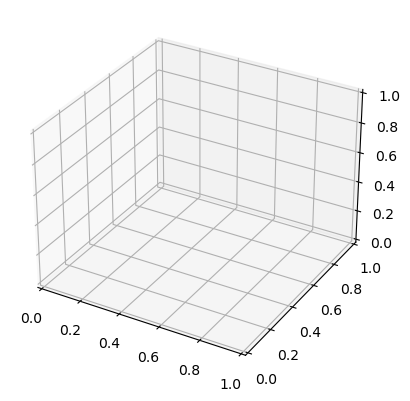

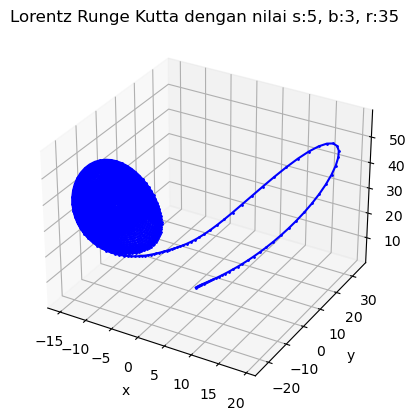

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
tmax = 25  # waktu simulasi
dt = 1.0e-2  # setiap step, waktu bertambah 10 ^ -2 detik
t = 0  # initial value untuk waktu, 0
s, b, r = 5, 3, 35
 
# menentukan initial value dari posisi partikel pada sumbu x, y, dan z dari bidang
x = np.zeros(tmax * int(1/dt) + 1)
y = np.zeros(tmax * int(1/dt) + 1)
z = np.zeros(tmax * int(1/dt) + 1)
 
x[0] = 1.0
y[0] = 1.0
z[0] = 1.0
XV = np.array([x[0], y[0], z[0]])
K = np.zeros(3)
K2 = np.zeros(3)
 
# membuat variable i sebagai counter untuk mengakses komponen vector dengan indexnya
i = 0
 
# loop selama t belum melebihi tmax
while t <= tmax:
    K[0] = s * (y[i] - x[i])
    K[1] = x[i] * (r - z[i]) - y[i]
    K[2] = x[i] * y[i] - b * z[i]

    K2[0] = s * ((XV[1] + dt * K[1]) - (XV[0] + dt * K[0]))
    K2[1] = (XV[0] + dt * K[0]) * (r - (XV[2] + dt * K[2])) - (XV[1] + dt * K[1])
    K2[2] = (XV[0] + dt * K[0]) * (XV[1] + dt * K[1]) - b * (XV[2] + dt * K[2])

    XV = XV + 0.5 * dt * (K+K2)
 
    # mengambil posisi dari partikel setelah dilakukan metode runge-kutta
    x[i+1] = XV[0]
    y[i+1] = XV[1]
    z[i+1] = XV[2]
 
    t = t + dt
    i = i + 1
    print(f'time = {t:.3f} ; x = {x[i]:.3f} ; y = {y[i]:.3f}; z = {z[i]:.3f}')
 
# membentuk grafis 3 dimensi (plot3) sebagai bidang yang dilalui oleh partikel
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
def animate(i):
    ax.plot(x[:i+1], y[:i+1], z[:i+1], 'r')
    ax.scatter(x[i], y[i], z[i], c='g', marker='', s=50)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim([-20, 30])
    ax.set_ylim([-60, 60])
    ax.set_zlim([1, 60])
ani = animation.FuncAnimation(fig,animate, interval = 10)
plt.show()
 
# menampilkan grafis hasil simulasi pergerakan partikel
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z, 'bo-', markersize=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(f'Lorentz Runge Kutta dengan nilai s:{s}, b:{b}, r:{r}')
plt.show()